# Social Networks - Assignment 3

This **Home Assignment** is **mandatory**, it does count towards your final chance to take part in the exam. This assignment covers sampling from Gnp models as well as efficient data structures used to represent graphs.

You can expect numpy, pandas and scipy to be installed.

## Formalities

**Submit in a group of 3-4 people until 30.06.2022 23:59CET. The deadline is strict!**

You have the opportunity for an prelim submission until 26.06.2022 23:59 CET. We will run your code once, and you can thus see whether there are small bugs that you might not have expected.

## Evaluation and Grading
General advice for programming excercises at *CSSH*:
Evaluation of your submission is done semi-automatically. Think of it as this notebook being 
executed once. Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Use external libraries only when specified by task.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature of e.g. a function usually can be inferred from task description, 
  code skeletons and test cases.
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
* Keep your code idempotent! Running it or parts of it multiple times must not yield different
  results. Minimize usage of global variables.
* Ensure your code / notebook terminates in reasonable time.

**There's a story behind each of these points! Don't expect us to fix your stuff!**

Regarding the scores, you will get no points for a task if:
- your function throws an unexpected error (e.g. takes the wrong number of arguments)
- gets stuck in an infinite loop
- takes much much longer than expected (e.g. >1s to compute the mean of two numbers)
- does not produce the desired output (e.g. returns an descendingly sorted list even though we asked for ascending, returns the mean and the std even though we asked for only the mean, prints an output instead of returning it!)

In [1]:
# credentials of all team members (you may add or remove members from the list)
team_members = [
    {
        'first_name': 'Tobias',
        'last_name': 'Holtdirk',
        'student_id': 344175
    },
    {
        'first_name': 'Asma',
        'last_name': 'Aziz',
        'student_id': 426774
    },
    {
        'first_name': 'Seyed Pouria',
        'last_name': 'Mirelmi',
        'student_id': 416910
    }
]

In [2]:
import numpy as np
import pandas as pd

##  Task 1: How Eventnet works (7 points total)


The main idea of this task is program the "core" of Eventnet. Eventnet naturally offers much more flexibility then what we do below, but we restrict ourselves to a very stripped down featureset to keep things simple. We will thus only consider three features already covered in the exercises: `user_activity` (user out degree), `article popularity` (article in degree) and `previous_activity` (edge multiplicity).

We have provided you with the "main loop" of eventnet below. The core functions to implement are the `update`, `log` and `negative_sample` steps.

In [77]:
# def main_loop(df, seed=1, start_row=0, end_row=-1):
#     net = EventNet_0()
#     rng = np.random.default_rng(seed)
#     out_rows = []
#     for row in df[start_row:end_row].itertuples(): # assumption: the rows are in time increasing order
#         out_rows.append(net.log(row))
#         net.update(row)
        
#         fake_row = net.negative_sample(row, rng)
#         if not fake_row is None:
#             out_rows.append(fake_row)

#     df_out = pd.DataFrame.from_records(out_rows, columns = columns)
#     return df_out, net

from tqdm import tqdm
def main_loop(df, seed=1, start_row=0, end_row=-1):
    net = EventNet_0()
    rng = np.random.default_rng(seed)
    out_rows = []
    for row in tqdm(list(df[start_row:end_row].itertuples())): # assumption: the rows are in time increasing order
        out_rows.append(net.log(row))
        net.update(row)
        
        fake_row = net.negative_sample(row, rng)
        if not fake_row is None:
            out_rows.append(fake_row)

    df_out = pd.DataFrame.from_records(out_rows, columns = columns)
    return df_out, net

## a) `update` (3.5)



Choose a dict like datatype that supports efficiently keeping track of the respective features (user out-degree, article in-degree and edge multiplicity), i.e. it stores for a node or an edge as a key the associated value. Furthermore, keep track of a list of users and a list of articles where each user/article appears exactly once. Finally,
implement the function `update` that updates the features given an observed row (see also the use in the main loop).

Throughout this implementation avoid quadratic runtimes in the number of users, articles or events.


## b) `log` (1.5)

Now create a `log` function that save the features of the provided row. It returns a named tuple of type `out_class` for the correpsponding row by recoding the respective features.

In [78]:
from collections import namedtuple
columns = ("IS_OBSERVED", "SOURCE", "TARGET", "TIME", "TYPE", "user_activity", "article_popularity", "previous_activity" )
out_class = namedtuple("out_class", columns)

## c) Negative sample (2)

Write a function `negative_sample` that draws one negative sample from all possible user/article combinations we have seen so far. Thereby avoid drawing the same user-article combination as the current row through rejection sampling (i.e. keep sampling until you have a valid pair).
When drawing (user,article) pairs, first draw an integer representing the user, then draw an integer representing the article. Draw the integers using `rng.integers`. If the resulting pair corresponds to the current row, discard both drawn values and repeat the described sampling process.
Return a namedtuple of the same type as in b).

In [79]:
from collections import defaultdict
"""Need to still implement the bulk of this class"""
class EventNet_0:
    def __init__(self):
        self.users = []
        self.articles = []
        self.user_out_degree = defaultdict(int)
        self.article_in_degree = defaultdict(int)
        self.previous_activity = defaultdict(int)

    def update(self, row):
        """Your code for a) here"""
        if row.user not in self.users:
            self.users.append(row.user)
        if row.article not in self.articles:
            self.articles.append(row.article)
        self.user_out_degree[row.user] += 1
        self.article_in_degree[row.article] += 1
        self.previous_activity[(row.user, row.article)] += 1

    def construct(self, is_observed, user, article, time):
        return out_class(is_observed, user, article, time, "edit",
                    self.user_out_degree[user],
                    self.article_in_degree[article],
                    self.previous_activity[(user, article)])
    
    def log(self, row):
        """Your code for b) here"""
        return self.construct(
            is_observed=1,
            user=row.user,
            article=row.article,
            time=row.time
        )

    def negative_sample(self, row, rng: np.random.Generator):
        if (len(self.users) * len(self.articles) ) <= 1:
            return None
        """Your code for c) here"""
        # rejection sampling
        neg_user = row.user
        neg_article = row.article
        while neg_user == row.user and neg_article == row.article:
            user_idx = rng.integers(len(self.users))
            neg_user = self.users[user_idx]
            article_idx = rng.integers(len(self.articles))
            neg_article = self.articles[article_idx]
        return self.construct(
            is_observed=0,
            user=neg_user,
            article=neg_article,
            time=row.time
        )

### Example on fake data

In [80]:
fake_row = namedtuple("fake_row", ("time", "article", "user", ))
def row(u,a):
    return fake_row(1, a, u)
row(1,-1)

fake_row(time=1, article=-1, user=1)

In [81]:
fake_row = namedtuple("fake_row", ("time", "article", "user", ))
def row(u,a):
    return fake_row(1, a, u)
rng1=np.random.default_rng(1)
net = EventNet_0()
net.update(row(1,-1))
net.update(row(1,-2))
print(net.log(row(1,-1)))
# out_class(IS_OBSERVED=1, SOURCE=1, TARGET=-1, TIME=1, TYPE='edit', user_activity=2, article_popularity=1, previous_activity=1)
print(net.log(row(0,-2)))
# out_class(IS_OBSERVED=1, SOURCE=0, TARGET=-2, TIME=1, TYPE='edit', user_activity=0, article_popularity=1, previous_activity=0)
print(net.negative_sample(row(0,-3), rng1))
# out_class(IS_OBSERVED=0, SOURCE=1, TARGET=-1, TIME=1, TYPE='edit', user_activity=2, article_popularity=1, previous_activity=1)
print(net.negative_sample(row(0,-3), rng1))
# out_class(IS_OBSERVED=0, SOURCE=1, TARGET=-2, TIME=1, TYPE='edit', user_activity=2, article_popularity=1, previous_activity=1)

out_class(IS_OBSERVED=1, SOURCE=1, TARGET=-1, TIME=1, TYPE='edit', user_activity=2, article_popularity=1, previous_activity=1)
out_class(IS_OBSERVED=1, SOURCE=0, TARGET=-2, TIME=1, TYPE='edit', user_activity=0, article_popularity=1, previous_activity=0)
out_class(IS_OBSERVED=0, SOURCE=1, TARGET=-1, TIME=1, TYPE='edit', user_activity=2, article_popularity=1, previous_activity=1)
out_class(IS_OBSERVED=0, SOURCE=1, TARGET=-2, TIME=1, TYPE='edit', user_activity=2, article_popularity=1, previous_activity=1)


### Example on real data

In [82]:
from pathlib import Path

In [83]:
p = Path('human_migration_events.csv')
p.exists()

True

In [84]:
df = pd.read_csv(p, delimiter=";")
df = df[df.type =="edit"] # filter for only edit events

df_out, net = main_loop(df)

100%|██████████| 816652/816652 [08:26<00:00, 1610.99it/s]


In [85]:
df.columns
# Index(['time', 'user', 'article', 'type'], dtype='object')

Index(['time', 'user', 'article', 'type'], dtype='object')

In [86]:
df_out.head(15)

,IS_OBSERVED,SOURCE,TARGET,TIME,TYPE,user_activity,article_popularity,previous_activity
0,1,209.91.204.xxx,Puerto Rico,984868500000,edit,0,0,0
1,1,TimShell,Puerto Rico,985483241000,edit,0,1,0
2,0,209.91.204.xxx,Puerto Rico,985483241000,edit,1,2,1
3,1,Koyaanisqatsi,Bermuda,987892807000,edit,0,0,0
4,0,TimShell,Bermuda,987892807000,edit,1,1,0
5,1,Koyaanisqatsi,Bermuda,987895460000,edit,1,1,1
6,0,Koyaanisqatsi,Puerto Rico,987895460000,edit,2,2,0
7,1,Koyaanisqatsi,History of Barbados,988030404000,edit,2,0,0
8,0,209.91.204.xxx,History of Barbados,988030404000,edit,1,1,0
9,1,Koyaanisqatsi~enwiki,History of the British Virgin Islands,988036307000,edit,0,0,0


### Output should be:


<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>IS_OBSERVED</th>      <th>SOURCE</th>      <th>TARGET</th>      <th>TIME</th>      <th>TYPE</th>      <th>user_activity</th>      <th>article_popularity</th>      <th>previous_activity</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1</td>      <td>209.91.204.xxx</td>      <td>Puerto Rico</td>      <td>984868500000</td>      <td>edit</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>1</th>      <td>1</td>      <td>TimShell</td>      <td>Puerto Rico</td>      <td>985483241000</td>      <td>edit</td>      <td>0</td>      <td>1</td>      <td>0</td>    </tr>    <tr>      <th>2</th>      <td>0</td>      <td>209.91.204.xxx</td>      <td>Puerto Rico</td>      <td>985483241000</td>      <td>edit</td>      <td>1</td>      <td>2</td>      <td>1</td>    </tr>    <tr>      <th>3</th>      <td>1</td>      <td>Koyaanisqatsi</td>      <td>Bermuda</td>      <td>987892807000</td>      <td>edit</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>4</th>      <td>0</td>      <td>TimShell</td>      <td>Bermuda</td>      <td>987892807000</td>      <td>edit</td>      <td>1</td>      <td>1</td>      <td>0</td>    </tr>    <tr>      <th>5</th>      <td>1</td>      <td>Koyaanisqatsi</td>      <td>Bermuda</td>      <td>987895460000</td>      <td>edit</td>      <td>1</td>      <td>1</td>      <td>1</td>    </tr>    <tr>      <th>6</th>      <td>0</td>      <td>Koyaanisqatsi</td>      <td>Puerto Rico</td>      <td>987895460000</td>      <td>edit</td>      <td>2</td>      <td>2</td>      <td>0</td>    </tr>    <tr>      <th>7</th>      <td>1</td>      <td>Koyaanisqatsi</td>      <td>History of Barbados</td>      <td>988030404000</td>      <td>edit</td>      <td>2</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>8</th>      <td>0</td>      <td>209.91.204.xxx</td>      <td>History of Barbados</td>      <td>988030404000</td>      <td>edit</td>      <td>1</td>      <td>1</td>      <td>0</td>    </tr>    <tr>      <th>9</th>      <td>1</td>      <td>Koyaanisqatsi~enwiki</td>      <td>History of the British Virgin Islands</td>      <td>988036307000</td>      <td>edit</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>10</th>      <td>0</td>      <td>Koyaanisqatsi~enwiki</td>      <td>Puerto Rico</td>      <td>988036307000</td>      <td>edit</td>      <td>1</td>      <td>2</td>      <td>0</td>    </tr>    <tr>      <th>11</th>      <td>1</td>      <td>KoyaanisQatsi</td>      <td>History of the Falkland Islands</td>      <td>988551301000</td>      <td>edit</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>12</th>      <td>0</td>      <td>TimShell</td>      <td>History of the Falkland Islands</td>      <td>988551301000</td>      <td>edit</td>      <td>1</td>      <td>1</td>      <td>0</td>    </tr>    <tr>      <th>13</th>      <td>1</td>      <td>KoyaanisQatsi</td>      <td>History of French Guiana</td>      <td>988552596000</td>      <td>edit</td>      <td>1</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>14</th>      <td>0</td>      <td>Koyaanisqatsi</td>      <td>Bermuda</td>      <td>988552596000</td>      <td>edit</td>      <td>3</td>      <td>2</td>      <td>2</td>    </tr>  </tbody></table>'


In [87]:
df_out.tail(15)

,IS_OBSERVED,SOURCE,TARGET,TIME,TYPE,user_activity,article_popularity,previous_activity
1633288,0,Shabeeb19,We Are America Alliance,1514820416000,edit,1,27,0
1633289,1,AnomieBOT,Recent African origin of modern humans,1514821157000,edit,4979,1637,8
1633290,0,Menopause,Declaration on the Protection of Women and Chi...,1514821157000,edit,1,16,0
1633291,1,Joe Roe,Recent African origin of modern humans,1514822399000,edit,37,1638,6
1633292,0,Wdcrawford,Rejects Revenge Theatre Company,1514822399000,edit,1,27,0
1633293,1,Narky Blert,Ankai Fort,1514825889000,edit,203,61,0
1633294,0,Billu Raja,Diego Fernández,1514825889000,edit,1,58,0
1633295,1,Jd22292,Day to Mark the Departure and Expulsion of Jew...,1514828866000,edit,13,34,0
1633296,0,Geodyde,List of active non-governmental organizations ...,1514828866000,edit,24,59,0
1633297,1,Balkanique,Iran–Turkey barrier,1514830718000,edit,24,14,10


### Output should be:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>IS_OBSERVED</th>      <th>SOURCE</th>      <th>TARGET</th>      <th>TIME</th>      <th>TYPE</th>      <th>user_activity</th>      <th>article_popularity</th>      <th>previous_activity</th>    </tr>  </thead>  <tbody>    <tr>      <th>1633288</th>      <td>0</td>      <td>Wdcrawford</td>      <td>Rejects Revenge Theatre Company</td>      <td>1514820416000</td>      <td>edit</td>      <td>1</td>      <td>27</td>      <td>0</td>    </tr>    <tr>      <th>1633289</th>      <td>1</td>      <td>AnomieBOT</td>      <td>Recent African origin of modern humans</td>      <td>1514821157000</td>      <td>edit</td>      <td>4979</td>      <td>1637</td>      <td>8</td>    </tr>    <tr>      <th>1633290</th>      <td>0</td>      <td>Billu Raja</td>      <td>Diego Fernández</td>      <td>1514821157000</td>      <td>edit</td>      <td>1</td>      <td>58</td>      <td>0</td>    </tr>    <tr>      <th>1633291</th>      <td>1</td>      <td>Joe Roe</td>      <td>Recent African origin of modern humans</td>      <td>1514822399000</td>      <td>edit</td>      <td>37</td>      <td>1638</td>      <td>6</td>    </tr>    <tr>      <th>1633292</th>      <td>0</td>      <td>Geodyde</td>      <td>List of active non-governmental organizations of national minorities, indigenous and diasporas</td>      <td>1514822399000</td>      <td>edit</td>      <td>24</td>      <td>59</td>      <td>0</td>    </tr>    <tr>      <th>1633293</th>      <td>1</td>      <td>Narky Blert</td>      <td>Ankai Fort</td>      <td>1514825889000</td>      <td>edit</td>      <td>203</td>      <td>61</td>      <td>0</td>    </tr>    <tr>      <th>1633294</th>      <td>0</td>      <td>Szilas</td>      <td>Belarusian citizenship</td>      <td>1514825889000</td>      <td>edit</td>      <td>1</td>      <td>76</td>      <td>0</td>    </tr>    <tr>      <th>1633295</th>      <td>1</td>      <td>Jd22292</td>      <td>Day to Mark the Departure and Expulsion of Jews from the Arab Countries and Iran</td>      <td>1514828866000</td>      <td>edit</td>      <td>13</td>      <td>34</td>      <td>0</td>    </tr>    <tr>      <th>1633296</th>      <td>0</td>      <td>Hydronium Hydroxide</td>      <td>Zeno map</td>      <td>1514828866000</td>      <td>edit</td>      <td>9</td>      <td>78</td>      <td>0</td>    </tr>    <tr>      <th>1633297</th>      <td>1</td>      <td>Balkanique</td>      <td>Iran–Turkey barrier</td>      <td>1514830718000</td>      <td>edit</td>      <td>24</td>      <td>14</td>      <td>10</td>    </tr>    <tr>      <th>1633298</th>      <td>0</td>      <td>Ksf official</td>      <td>Meshwesh</td>      <td>1514830718000</td>      <td>edit</td>      <td>1</td>      <td>114</td>      <td>0</td>    </tr>    <tr>      <th>1633299</th>      <td>1</td>      <td>Jd22292</td>      <td>1948 Palestinian exodus</td>      <td>1514831144000</td>      <td>edit</td>      <td>14</td>      <td>3229</td>      <td>0</td>    </tr>    <tr>      <th>1633300</th>      <td>0</td>      <td>Dferrantino</td>      <td>Europe Sees Syria</td>      <td>1514831144000</td>      <td>edit</td>      <td>1</td>      <td>88</td>      <td>0</td>    </tr>    <tr>      <th>1633301</th>      <td>1</td>      <td>Jd22292</td>      <td>Internally displaced Palestinians</td>      <td>1514831226000</td>      <td>edit</td>      <td>15</td>      <td>145</td>      <td>0</td>    </tr>    <tr>      <th>1633302</th>      <td>0</td>      <td>Olim2317</td>      <td>Mandari people</td>      <td>1514831226000</td>      <td>edit</td>      <td>5</td>      <td>70</td>      <td>0</td>    </tr>  </tbody></table>'

# Task 2: Evaluation of link prediction (18 points total)

In this task you are first going to implement three link prediction metrics: preferential attachment, common neighbors and Jaccard similarity. We then will implement functions needed to compute the ROC/PR curves for a given pairwise score matrix and observed adjacency. The final task is then to evaluate these functions on a real world dataset.

In [126]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [127]:
def print_matrix(M):  
    s = repr(M)
    lines = s.splitlines()
    lines = ["# "+line for line in lines]
    print("\r\n".join(lines))

In [128]:
A=sparse.random(2000,2000,.005,'coo')
A=(A+A.T).tocoo()
A.setdiag(np.zeros(2000))

In [129]:
values = np.ones(len(A.col))
values[A.col==A.row]=0
A = sparse.coo_matrix((values,(A.col, A.row)), dtype = np.int16)

In [130]:
# 4 line
A_small_1 = sparse.coo_matrix(([1,1,1], ([0,1,2],[1,2,3])), shape=(4,4) )
A_small_1 = (A_small_1+A_small_1.T).tocoo()

In [131]:
# 3 line
A_small_2 = sparse.coo_matrix(([1,1], ([0,1],[1,2])), shape=(3,3) )
A_small_2 = (A_small_2+A_small_2.T).tocoo()

In [132]:
# 4 cycle with an additional edge
A_small_3 = sparse.coo_matrix(([1,1,1,1,1], ([0,1,2,3,3],[1,2,3,0,4])), shape=(5,5) )
A_small_3 = (A_small_3+A_small_3.T).tocoo()

In [133]:
# three cycle
A_small_4 = sparse.coo_matrix(([1,1,1], ([0,1,2],[1,2,0])), shape=(3,3) )
A_small_4 = (A_small_4+A_small_4.T).tocoo()

In [134]:
# three cycle with an additional edge
A_small_5 = sparse.coo_matrix(([1,1,1,1], ([0,1,2,2],[1,2,0,3])), shape=(4,4) )
A_small_5 = (A_small_5+A_small_5.T).tocoo()

### a) preferential attachment (2)

Compute the pairwise preferential attachment score of an adjacency matrix for all pairs of nodes. Assume the matrix describes a simple undirected graph with no self loops. Assume A is an adjacency matrix in sparse coo format. 
Return a dense (numpy) array of type `np.int16` with zeros on the diagonals.

In [135]:
def preferential_attachment(A: sparse.coo_matrix):
    # (u,v) = deg(u) * deg(v)
    # deg(u) = sum(A[u])
    # => (u,v) = sum(A[u]) * sum(A[v])
    degs = np.sum(A, axis=1)
    res = degs@degs.T
    np.fill_diagonal(res, 0)
    return np.asarray(res, dtype=np.int16)

In [136]:
# 3 line
print_matrix(preferential_attachment(A_small_2))

# array([[0, 2, 1],
#        [2, 0, 2],
#        [1, 2, 0]], dtype=int32)

# array([[0, 2, 1],
#        [2, 0, 2],
#        [1, 2, 0]], dtype=int16)


In [137]:
# 4 cycle with an additional edge
print_matrix(preferential_attachment(A_small_3))

# array([[0, 4, 4, 6, 2],
#        [4, 0, 4, 6, 2],
#        [4, 4, 0, 6, 2],
#        [6, 6, 6, 0, 3],
#        [2, 2, 2, 3, 0]], dtype=int32)

# array([[0, 4, 4, 6, 2],
#        [4, 0, 4, 6, 2],
#        [4, 4, 0, 6, 2],
#        [6, 6, 6, 0, 3],
#        [2, 2, 2, 3, 0]], dtype=int16)


In [138]:
%%time
M_pref = preferential_attachment(A)

CPU times: user 14.6 ms, sys: 6.7 ms, total: 21.3 ms
Wall time: 20.2 ms


In [139]:
del M_pref

### b) common neighbors (2)

Compute the pairwise common neighbors score of an adjacency matrix for all pairs of nodes. Assume the matrix describes a simple undirected graph with no self loops. Assume A is an adjacency matrix in sparse coo format. 
Return a dense (numpy) array of type `np.int32` with zeros on the diagonals. 

In [140]:
def common_neighbors(A: sparse.coo_matrix):
    # |N(u) INTERSECTION N(v)|
    res = (A.T@A).toarray()
    np.fill_diagonal(res, 0)
    return np.asarray(res, dtype=np.int32)

In [141]:
# 3 line
print_matrix(common_neighbors(A_small_2))

# array([[0, 0, 1],
#        [0, 0, 0],
#        [1, 0, 0]], dtype=int32)

# array([[0, 0, 1],
#        [0, 0, 0],
#        [1, 0, 0]], dtype=int32)


In [142]:
# 3 cycle
print_matrix(common_neighbors(A_small_4))

# array([[0, 0, 1],
#        [0, 0, 0],
#        [1, 0, 0]], dtype=int32)

# array([[0, 1, 1],
#        [1, 0, 1],
#        [1, 1, 0]], dtype=int32)


In [143]:
# 4 line
print_matrix(common_neighbors(A_small_1))
# array([[0, 0, 1, 0],
#        [0, 0, 0, 1],
#        [1, 0, 0, 0],
#        [0, 1, 0, 0]], dtype=int32)

# array([[0, 0, 1, 0],
#        [0, 0, 0, 1],
#        [1, 0, 0, 0],
#        [0, 1, 0, 0]], dtype=int32)


In [144]:
%%time
M_common=common_neighbors(A)


CPU times: user 17 ms, sys: 3.43 ms, total: 20.4 ms
Wall time: 19.4 ms


In [145]:
del M_common

### c) Jaccard (2)


Compute the pairwise Jaccard score of an adjacency matrix for all pairs of nodes. Assume the matrix describes a simple undirected graph with no self loops. Assume A is an adjacency matrix in sparse coo format. 
Return a dense (numpy) array of type `np.float32` with zeros on the diagonals.

In case both nodes involved have zero degree we define the Jaccard index to be zero.

In [146]:
def Jaccard(A):
    # |N(u) INTERSECTION N(v)| / |N(u) UNION N(v)|
    common_neigh = (A.T@A).toarray()
    tmp = np.sum(A, axis=1) * np.ones((1,A.shape[0]))
    normalization = tmp + tmp.T - common_neigh
    res = np.divide(common_neigh, normalization, out=np.zeros(A.shape), where=normalization != 0)
    np.fill_diagonal(res, 0)
    return np.asarray(res, dtype=np.float32)

In [147]:
# 4 line
M_Jaccard_small_1 = Jaccard(A_small_1)
print_matrix(M_Jaccard_small_1)
# array([[0. , 0. , 0.5, 0. ],
#        [0. , 0. , 0. , 0.5],
#        [0.5, 0. , 0. , 0. ],
#        [0. , 0.5, 0. , 0. ]], dtype=float32)

# array([[0. , 0. , 0.5, 0. ],
#        [0. , 0. , 0. , 0.5],
#        [0.5, 0. , 0. , 0. ],
#        [0. , 0.5, 0. , 0. ]], dtype=float32)


In [148]:
# 3 line
M_Jaccard_small_2 = Jaccard(A_small_2)
print_matrix(M_Jaccard_small_2)
# array([[0., 0., 1.],
#        [0., 0., 0.],
#        [1., 0., 0.]], dtype=float32)

# array([[0., 0., 1.],
#        [0., 0., 0.],
#        [1., 0., 0.]], dtype=float32)


In [149]:
# 3 cycle with an additional edge
print_matrix(Jaccard(A_small_5))

# array([[0.        , 0.33333334, 0.25      , 0.5       ],
#        [0.33333334, 0.        , 0.25      , 0.5       ],
#        [0.25      , 0.25      , 0.        , 0.        ],
#        [0.5       , 0.5       , 0.        , 0.        ]], dtype=float32)

# array([[0.        , 0.33333334, 0.25      , 0.5       ],
#        [0.33333334, 0.        , 0.25      , 0.5       ],
#        [0.25      , 0.25      , 0.        , 0.        ],
#        [0.5       , 0.5       , 0.        , 0.        ]], dtype=float32)


In [150]:
# the odd case where two nodes have zero degree
A_empty = sparse.coo_matrix(([], ([],[])), shape=(4,4) )
print_matrix(Jaccard(A_empty))

# array([[0., 0., 0., 0.],
#        [0., 0., 0., 0.],
#        [0., 0., 0., 0.],
#        [0., 0., 0., 0.]], dtype=float32)


In [151]:
%%time
M_Jaccard = Jaccard(A)

CPU times: user 223 ms, sys: 104 ms, total: 327 ms
Wall time: 113 ms


In [152]:
del M_Jaccard

#### Helper function

Usually the number of different values (i.e. different thresholds) is much smaller than all values in the matrix. The following function counts the number values 

In [153]:
def value_counts(M, additional_keys=None):
    if M.dtype.char in np.typecodes['AllInteger']:
        keys, vals = value_counts_int(M)
    elif M.dtype.char in np.typecodes['Float']:
        keys, vals = value_counts_float(M)
    else:
        raise ValueError(f"invalid dtype {M.dtype}")

    if additional_keys is None:
        return keys, vals
    append_indices = additional_keys>keys.max()
    append_keys = additional_keys[append_indices]
    additional_keys=additional_keys[~append_indices]

    indices = np.searchsorted(keys, additional_keys)
    inds = keys[indices]!=additional_keys
    new_indices = indices[inds]
    new_values = additional_keys[inds]
    out_keys = np.insert(keys, new_indices, new_values)
    out_values = np.insert(vals, new_indices, np.zeros(len(new_indices), dtype=vals.dtype))
    
    out_keys = np.append(out_keys, append_keys)
    out_values = np.append(out_values, np.zeros(len(append_keys), dtype=vals.dtype))
    
    return out_keys, out_values


In [154]:
def value_counts_int(M_in):
    counts = np.bincount(M_in.flat)
    a = np.nonzero(counts)[0]
    return a, counts[a]

In [155]:
def value_counts_float(M_in):
    return np.unique(M_in.flat, return_counts=True)

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

### d) fps tps and thresholds (3)

Write a function that computes the true positive counts tps, false positive counts fps and thresholds given the observed adjacency matrix A and pairwise score matrix M. You can compare your results with those from sklearn.

For simplicity we are doing the following even though they would in principle require more careful treatment:
1) We are counting each dyad (i.e. each correct **undirected** edge contributes 2 tps)

2) We also include the diagonals as false positives even though they can never be nonzero

**Important notice:**

In the lecture the definition for the thresholds is $f(x) > t$ in this task we use the definition $f(x) \geq t$ such that our results essentially aling with the networkx definition.

In [157]:
def get_fps_tps_thresholds(A: sparse.coo_matrix, M: np.ndarray):
    thresholds = sorted(np.unique(M), reverse=True)
    fps = []
    tps = []
    for t in thresholds:
        is_over_threshold = M >= t
        A_delta = A - is_over_threshold
        fps.append(np.count_nonzero(A_delta == -1))
        A_tp = np.multiply(is_over_threshold, A.toarray())
        tps.append(np.count_nonzero(A_tp == 1))
    return (np.asarray(fps), 
            np.asarray(tps), 
            np.asarray(thresholds))

In [158]:
A_tmp = A_small_1
M_tmp = preferential_attachment(A_tmp)
print(M_tmp)
print(A_tmp.toarray())
get_fps_tps_thresholds(A_tmp, M_tmp)
# Result is
#(array([ 0,  4,  6, 10], dtype=int64),
# array([2, 6, 6, 6], dtype=int64),
# array([4, 2, 1, 0], dtype=int64))

# This reads as:
#  at threshold of 4 we have 0 false positives and 2 true positives
#  lowering the threshold to 2 we get 4 false positives and 6 true positives
#  ...

# !Important notice!:
# in the lecture the definition is f(x) > t
# here the definition is f(x) >= t

[[0 2 2 1]
 [2 0 4 2]
 [2 4 0 2]
 [1 2 2 0]]
[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


(array([ 0,  4,  6, 10]),
 array([2, 6, 6, 6]),
 array([4, 2, 1, 0], dtype=int16))

In [159]:
A_tmp = A_small_1
M_tmp = Jaccard(A_tmp)
print(M_tmp)
print(A_tmp.toarray())
get_fps_tps_thresholds(A_tmp, M_tmp)
#(array([ 4, 10], dtype=int64),
# array([0, 6], dtype=int64),
# array([0.5, 0. ], dtype=float32))

[[0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]]
[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


(array([ 4, 10]), array([0, 6]), array([0.5, 0. ], dtype=float32))

### e) roc_curve (1.5)

Implement the function `my_roc_curve` that computes the roc curve for the observed adjacecy matrix `A` and pairwise score matrix `M`. Thereby use the `get_fps_tps_thresholds` function.

To make sure the roc curve always starts at $(0,0)$ we are introducing one additional point that lies 1 above the largest threshold present in the `M` matrix.

In [160]:
def my_roc_curve(A, M):
    fps, tps, thresholds = get_fps_tps_thresholds(A, M)
    A = A.toarray()
    # insert biggest threshold
    t = max(thresholds) + 1
    thresholds = np.insert(thresholds, 0, t)
    is_over_threshold = M >= t
    A_delta = A - is_over_threshold
    fps = np.insert(fps, 0, np.count_nonzero(A_delta == -1))
    A_tp = np.multiply(is_over_threshold, A)
    tps = np.insert(tps, 0, np.count_nonzero(A_tp == 1))
    FPR = fps / np.count_nonzero(A == 0)
    TPR = tps / np.count_nonzero(A == 1)
    return FPR, TPR, thresholds

In [161]:
A_tmp = A_small_2
M_tmp = Jaccard(A_tmp)
print(M_tmp)
print(A_tmp.toarray())
my_roc_curve(A_tmp, M_tmp)
#(array([0. , 0.4, 1. ]),
# array([0., 0., 1.]),
# array([2., 1., 0.], dtype=float32))

[[0. 0. 1.]
 [0. 0. 0.]
 [1. 0. 0.]]
[[0 1 0]
 [1 0 1]
 [0 1 0]]


(array([0. , 0.4, 1. ]),
 array([0., 0., 1.]),
 array([2., 1., 0.], dtype=float32))

In [162]:
A_tmp = A_small_3
M_tmp = Jaccard(A_tmp)
print(M_tmp)
print(A_tmp.toarray())
my_roc_curve(A_tmp, M_tmp)
#(array([0.        , 0.13333333, 0.26666667, 0.53333333, 1.        ]),
# array([0., 0., 0., 0., 1.]),
# array([2.       , 1.       , 0.6666667, 0.5      , 0.       ], dtype=float32))

[[0.        0.        1.        0.        0.5      ]
 [0.        0.        0.        0.6666667 0.       ]
 [1.        0.        0.        0.        0.5      ]
 [0.        0.6666667 0.        0.        0.       ]
 [0.5       0.        0.5       0.        0.       ]]
[[0 1 0 1 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 0 0 1 0]]


(array([0.        , 0.13333333, 0.26666667, 0.53333333, 1.        ]),
 array([0., 0., 0., 0., 1.]),
 array([2.       , 1.       , 0.6666667, 0.5      , 0.       ],
       dtype=float32))

In [163]:
# Similar output using sklearn

roc_curve(A_tmp.toarray().ravel(), M_tmp.ravel())

(array([0.        , 0.13333333, 0.26666667, 0.53333333, 1.        ]),
 array([0., 0., 0., 0., 1.]),
 array([2.       , 1.       , 0.6666667, 0.5      , 0.       ],
       dtype=float32))

### f) precision recall curve (1.5)

Write a function that computes the precision recall curve for the pairwise value matrix `M` and the observed adjacency matrix `A`.

The function returns two arrays, the first represent the recall values, and the second the corresponding precision values.

We artificially introduce an addition point in the precision recall curve with value $(0, ?)$ (recall 0, precision ?). the value of ? (we choose it as one) can be arbitrary. Compare with the definition in the lecture (deck 07, slide 42). There an artificial recall value is introduced at $f(x_0)$. To be similar to sklearn we also introcude a precision value for $f(x_0)$ which does not affect the AUC.PR score (compare slide, sum starts at 1).
This has to do with how to calculate the area under a curve. For different such ways see below.

In [164]:
# NOTE: You may also output in the order recall, precision, thresholds as in the old notebook(!)
def my_pr_curve(A, M):
    A = A.toarray()
    thresholds = sorted(np.unique(M), reverse=False)
    precisions = []
    recalls = []
    for t in thresholds:
        is_over_threshold = M >= t
        A_delta = A - is_over_threshold
        A_tp = np.multiply(is_over_threshold, A)
        FP = np.count_nonzero(A_delta == -1)
        TP = np.count_nonzero(A_tp == 1)
        P = np.count_nonzero(A == 1)
        precision = TP/(TP+FP) if TP+FP else 0
        recall = TP/P if P else 0
        precisions.append(precision)
        recalls.append(recall)
    # artifical point (0,1)
    precisions.append(1)
    recalls.append(0)
    return precisions, recalls, thresholds

In [165]:
A_tmp = A_small_3
M_tmp = Jaccard(A_tmp)
print(M_tmp)
print(A_tmp.toarray())
# NOTE: Output order is Precision, Recall, Thresholds (other orderings are also correct)
my_pr_curve(A_tmp, M_tmp)
# (array([0.4, 0. , 0. , 0. , 1. ]),
#  array([1., 0., 0., 0., 0.]),
#  array([0.       , 0.5      , 0.6666667, 1.       ], dtype=float32))

[[0.        0.        1.        0.        0.5      ]
 [0.        0.        0.        0.6666667 0.       ]
 [1.        0.        0.        0.        0.5      ]
 [0.        0.6666667 0.        0.        0.       ]
 [0.5       0.        0.5       0.        0.       ]]
[[0 1 0 1 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 0 0 1 0]]


([0.4, 0.0, 0.0, 0.0, 1], [1.0, 0.0, 0.0, 0.0, 0], [0.0, 0.5, 0.6666667, 1.0])

In [166]:
precision_recall_curve(A_tmp.toarray().ravel(), M_tmp.ravel())

(array([0.4, 0. , 0. , 0. , 1. ]),
 array([1., 0., 0., 0., 0.]),
 array([0.       , 0.5      , 0.6666667, 1.       ], dtype=float32))

### Information: There are different ways to implement the AUC

See below for the different options. The one used in the lecture is "right" or "left" depending on the order of values.



In [167]:
def my_auc(x,y, kind):
    s=0
    for i in range(1,len(x)):
        if kind=="trapezoid":
            s+=(y[i]+y[i-1])* (x[i]-x[i-1])/2
        elif kind=="right":
            s+=(y[i])* (x[i]-x[i-1])
        elif kind == "left":
            s+=(y[i-1])* (x[i]-x[i-1])
        else:
            raise ValueError
    return s

In [168]:
x = np.linspace(0,1)
y = 3*np.linspace(0,1)
print(my_auc(x,y, "trapezoid"))
print(my_auc(x,y, "right"))
print(my_auc(x,y, "left"))

1.5
1.530612244897959
1.469387755102041


In [169]:
x = np.linspace(0,1)
y = 3*np.linspace(0,1)
y[-1]=10
print(my_auc(x,y, "trapezoid"))
print(my_auc(x,y, "right"))
print(my_auc(x,y, "left"))

# method left is unaffected when changing y[-1], compare my_pr_curve

1.5714285714285716
1.6734693877551021
1.469387755102041


In [170]:
import sklearn
print(sklearn.__version__)
# need resonable recent sklearn (e.g. 1.1.1)

1.1.1


### g) Link prediction for a friendship network (6)

We are now looking to evaluate the above three metrics on real world data. Therefore download the `facebook-links.txt.anon` from https://socialnetworks.mpi-sws.org/data-wosn2009.html. Assume the file is in your local working directory so you can load it from the path `'./facebook-links.txt.anon'`We then compute AUC-ROC and AUC-PR for the three different metrics over the first 20 weeks of the data. Thereby we compute the pairwise score matrix on one week and then evaluate it on the following week.

In preparation of the dataframe discard all the friendships that cannot be pinpointed (they are indicated by `\N`). Save this preprocessed dataframe ad `df`.

Finally create one plot with AUC-ROC for the different weeks and a AUC-PR curve for the different weeks. <b> Please save those plots here in the notebook as "auc-roc.png" and "auc-pr.png" respectively. </b>
Also save the y values of the curves as `auc_roc_xyz` and `auc_pr_xyz` where `xyz` is `jaccard`, `common_neighbors` and `preferential_attachment` (e.g. `auc_roc_jaccard`). 

Regarding the time frames, the first week is from `2006-09-05 11:15:29` (inclusive) to  `2006-09-12 11:15:29` (exclusive). During this period 1693 friendship have been formed.

In [171]:
import pandas as pd
import numpy as np
from scipy import sparse
from datetime import timedelta

In [172]:
def join_matrices(A1, A2, names1, names2):
    """ Join two graphs represented by adjacency matrices and unique identifiers of the involved nodes
    
    A helper function that given two matrices A1 and A2 whose nodes are identified by names 
    returns two new matrices which live on the unified nodeset names1 $\cup$ names2
    """
    common_names = np.union1d(names1, names2)

    pos_names1 = np.searchsorted(common_names, names1)
    pos_names2 = np.searchsorted(common_names, names2)
    
    col1 = pos_names1[A1.col]
    row1 = pos_names1[A1.row]
    
    col2 = pos_names2[A2.col]
    row2 = pos_names2[A2.row]
    
    new_n = len(common_names)
    common_shape = (new_n, new_n)
    A1_out = sparse.coo_matrix((np.ones(len(col1)),(col1, row1)), dtype = np.int16, shape=common_shape)
    A2_out = sparse.coo_matrix((np.ones(len(col2)),(col2, row2)), dtype = np.int16, shape=common_shape)
    
    return A1_out, A2_out, common_names

In [173]:
df = pd.read_csv('facebook-links.txt', delimiter='\t', header=None)
df.columns = ['user1', 'user2', 'timestamp']
df = df[df.timestamp != r'\N']
df

,user1,user2,timestamp
18,1,20,1217964960
22,1,24,1227241074
23,1,25,1229314692
34,38,39,1160092062
35,38,40,1163035868
...,...,...,...
1545680,21169,25890,1202409581
1545681,21169,12888,1201988286
1545682,21169,18660,1214804215
1545683,48809,24065,1210066726


In [174]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s')
df.sort_values('timestamp', inplace=True)
df

,user1,user2,timestamp
1116788,15110,21914,2006-09-05 11:15:29
1183146,1981,507,2006-09-05 11:53:08
2502,1408,1434,2006-09-05 12:16:26
158661,8473,11229,2006-09-05 12:43:38
273088,128,9035,2006-09-05 13:16:56
...,...,...,...
1535383,34471,10079,2009-01-20 21:20:41
1069067,23161,36577,2009-01-21 04:35:38
176710,4175,4179,2009-01-21 07:17:43
753851,22308,3963,2009-01-21 20:37:18


In [175]:
# establish the week
min_timestamp = min(df.timestamp)
df['week'] = df.timestamp.apply(lambda t: t-min_timestamp)
df.week = df.week.dt.days//7 + 1
df

,user1,user2,timestamp,week
1116788,15110,21914,2006-09-05 11:15:29,1
1183146,1981,507,2006-09-05 11:53:08,1
2502,1408,1434,2006-09-05 12:16:26,1
158661,8473,11229,2006-09-05 12:43:38,1
273088,128,9035,2006-09-05 13:16:56,1
...,...,...,...,...
1535383,34471,10079,2009-01-20 21:20:41,125
1069067,23161,36577,2009-01-21 04:35:38,125
176710,4175,4179,2009-01-21 07:17:43,125
753851,22308,3963,2009-01-21 20:37:18,125


In [176]:
# TEST
len(df[df.week == 1]) == 1693

True

In [177]:
# per week adjacency matrices
A_per_week = []
users = pd.concat([df[df.week <= 20].user1, df[df.week <= 20].user2]).unique()
ones_coordinates = set()
for week in range(1, 21):
    for _, link in df[df.week == week].iterrows():
        x = np.where(users == link.user1)[0][0]
        y = np.where(users == link.user2)[0][0]
        ones_coordinates.add((x,y))
        ones_coordinates.add((y,x))
    ones_coordinates_list = list(ones_coordinates)
    coo_row = [coordinate[0] for coordinate in ones_coordinates_list]
    coo_col = [coordinate[1] for coordinate in ones_coordinates_list]
    coo_data = [1 for _ in ones_coordinates_list]
    A_tmp = sparse.coo_matrix((coo_data, (coo_row, coo_col)), shape=(len(users), len(users)), dtype=np.int8)
    A_per_week.append(sparse.coo_matrix(A_tmp))
A_per_week

[<9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 2630 stored elements in COOrdinate format>,
 <9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 5168 stored elements in COOrdinate format>,
 <9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 7526 stored elements in COOrdinate format>,
 <9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 10886 stored elements in COOrdinate format>,
 <9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 14484 stored elements in COOrdinate format>,
 <9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 18262 stored elements in COOrdinate format>,
 <9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 21916 stored elements in COOrdinate format>,
 <9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 25202 stored elements in COOrdinate format>,
 <9999x9999 sparse matrix of type '<class 'numpy.int8'>'
 	with 28514 stored elements in COOrdinate format>,
 <9999x9999 sparse mat

In [178]:
preferential_attachment_per_week = [preferential_attachment(A_tmp) for A_tmp in tqdm(A_per_week)]

100%|██████████| 20/20 [00:14<00:00,  1.38it/s]


In [179]:
common_neighbors_per_week = [common_neighbors(A_tmp) for A_tmp in tqdm(A_per_week)]

100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


In [180]:
Jaccard_per_week = [Jaccard(A_tmp) for A_tmp in tqdm(A_per_week)]

100%|██████████| 20/20 [01:11<00:00,  3.57s/it]


In [183]:
# AUC_ROC
roc_curves_per_week = [[],[],[]]
for week in tqdm(list(range(1,20))):
    for idx, l in enumerate([preferential_attachment_per_week, common_neighbors_per_week, Jaccard_per_week]):
        M_tmp = l[week-1]
        A_tmp = A_per_week[week]
        roc_curves_per_week[idx].append(my_roc_curve(A_tmp, M_tmp))
        # roc_curves_per_week[idx].append(roc_curve(A_tmp.toarray().ravel(), M_tmp.ravel()))

100%|██████████| 1/1 [00:34<00:00, 34.16s/it]


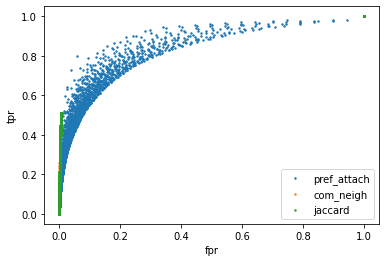

In [ ]:
fig, ax = plt.subplots()

x = []
auc_roc_preferential_attachment = []
for FPR, TPR, thresholds in roc_curves_per_week[0]:
    x += list(FPR)
    auc_roc_preferential_attachment += list(TPR)
ax.scatter(x, auc_roc_preferential_attachment, label='pref_attach', s=2)

x = []
auc_roc_common_neighbors = []
for FPR, TPR, thresholds in roc_curves_per_week[1]:
    x += list(FPR)
    auc_roc_common_neighbors += list(TPR)
ax.scatter(x, auc_roc_common_neighbors, label='com_neigh', s=2)

x = []
auc_roc_jaccard = []
for FPR, TPR, thresholds in roc_curves_per_week[2]:
    x += list(FPR)
    auc_roc_jaccard += list(TPR)
ax.scatter(x, auc_roc_jaccard, label='jaccard', s=2)

ax.legend()
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
plt.savefig('auc-roc.png')
plt.show()

In [184]:
# AUC_PR
pr_curves_per_week = [[],[],[]]
for week in tqdm(list(range(1,20))):
    for idx, l in enumerate([preferential_attachment_per_week, common_neighbors_per_week, Jaccard_per_week]):
        M_tmp = l[week-1]
        A_tmp = A_per_week[week]
        pr_curves_per_week[idx].append(my_pr_curve(A_tmp, M_tmp))
        # pr_curves_per_week[idx].append(precision_recall_curve(A_tmp.toarray().ravel(), M_tmp.ravel()))

  0%|          | 0/1 [00:00<?, ?it/s]

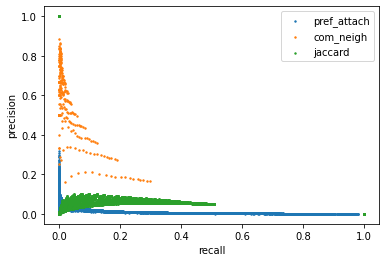

In [ ]:
fig, ax = plt.subplots()

x = []
auc_pr_preferential_attachment = []
for precision, recall, thresholds in pr_curves_per_week[0]:
    x += list(recall)
    auc_pr_preferential_attachment += list(precision)
ax.scatter(x, auc_pr_preferential_attachment, label='pref_attach', s=2)

x = []
auc_pr_common_neighbors = []
for precision, recall, thresholds in pr_curves_per_week[1]:
    x += list(recall)
    auc_pr_common_neighbors += list(precision)
ax.scatter(x, auc_pr_common_neighbors, label='com_neigh', s=2)

x = []
auc_pr_jaccard = []
for precision, recall, thresholds in pr_curves_per_week[2]:
    x += list(recall)
    auc_pr_jaccard += list(precision)
ax.scatter(x, auc_pr_jaccard, label='jaccard', s=2)

ax.legend()
ax.set_xlabel('recall')
ax.set_ylabel('precision')
plt.savefig('auc-pr.png')
plt.show()